In [1]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as s
import plotly.express as px

In [64]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "AI"

In [65]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

In [73]:
region = pytrends.interest_by_region()
region = region.sort_values(by=keyword, ascending=False).head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4284\704292892.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




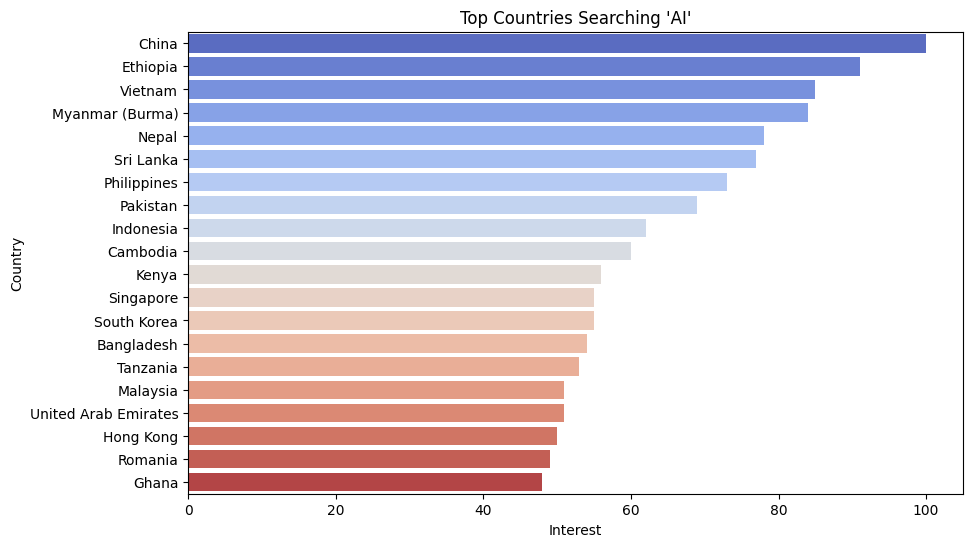

In [74]:
plt.figure(figsize=(10,6))
s.barplot(x=region[keyword], y=region.index, palette='coolwarm')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

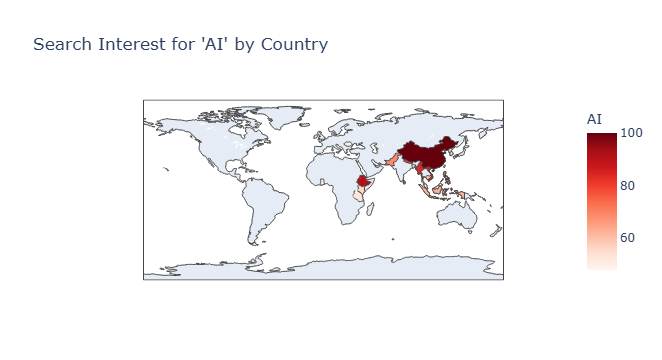

In [77]:
region = region.reset_index()
fig = px.choropleth(region,
 locations='geoName',
 locationmode='country names',
 color=keyword,
 title=f"Search Interest for '{keyword}' by Country",
 color_continuous_scale='reds')
fig.show()

In [79]:
time = pytrends.interest_over_time()

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



(array([19905., 19967., 20028., 20089., 20148., 20209.]),
 [Text(19905.0, 0, '2024-07'),
  Text(19967.0, 0, '2024-09'),
  Text(20028.0, 0, '2024-11'),
  Text(20089.0, 0, '2025-01'),
  Text(20148.0, 0, '2025-03'),
  Text(20209.0, 0, '2025-05')])

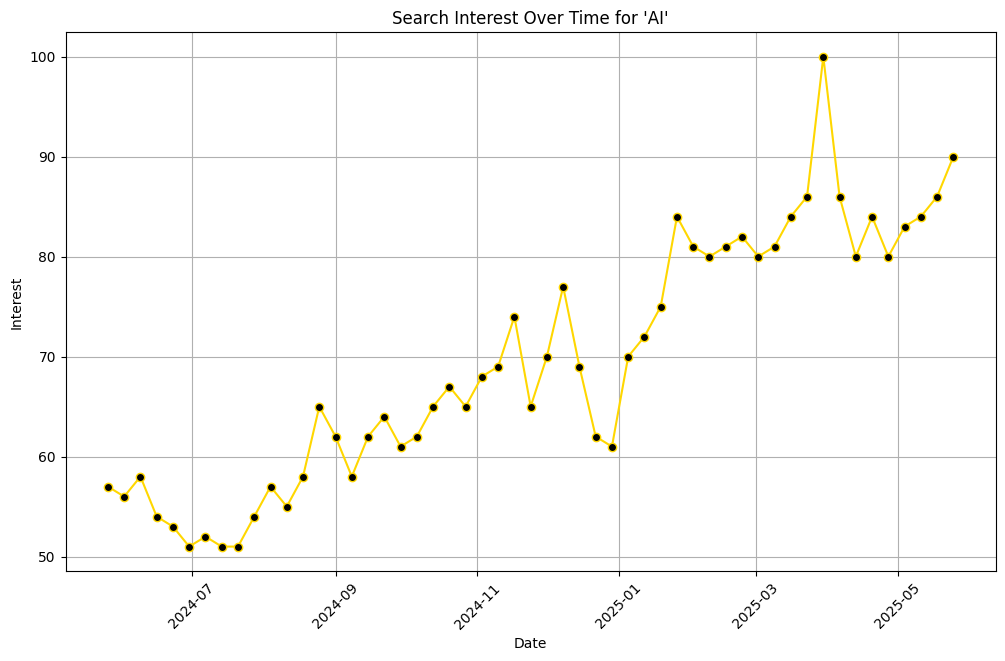

In [83]:
plt.figure(figsize=(12,7))
plt.plot(time_df.index, time_df[keyword], marker='o', markerfacecolor = 'black', color='gold')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)

In [118]:
klist = ["instagram", "AI", "DSA", "Cricket"]
pytrends.build_payload(klist, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



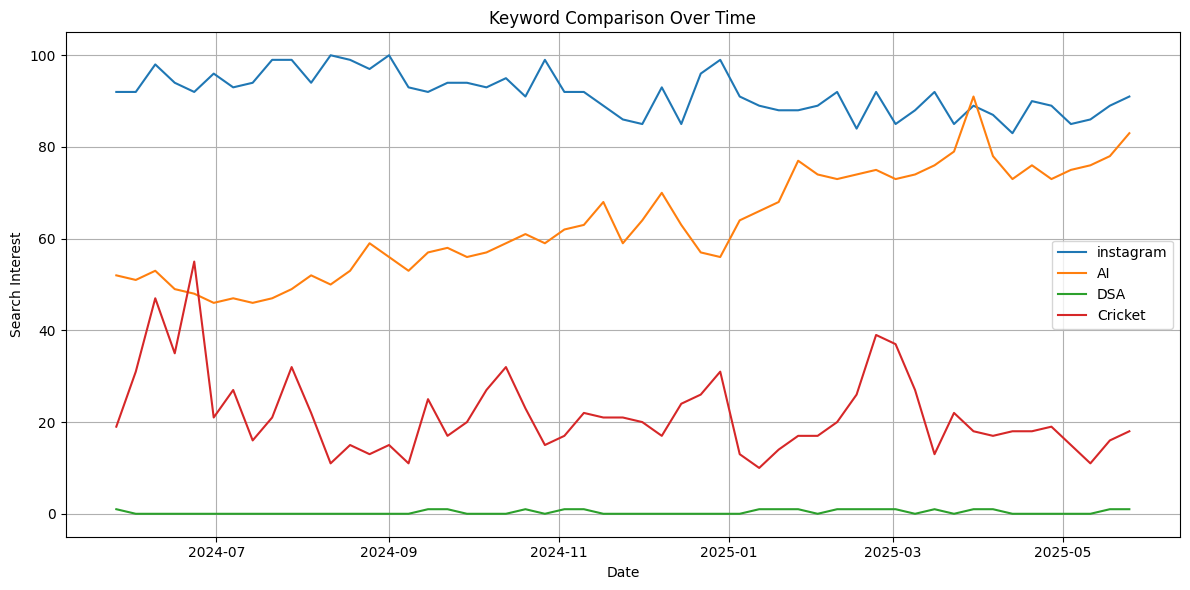

In [125]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for i in klist:
 plt.plot(compare_df.index, compare_df[i], label=i)
plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [127]:
data = pytrends.interest_over_time()

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [128]:
if data.empty:
    print("No data found for this keyword. Please try another.")
else:
    if 'isPartial' in data.columns:
        data = data[~data['isPartial']]  # Remove incomplete data

    data = data[[keyword]]  # Keep only the keyword column

In [129]:
n_lags = 7
for i in range(1, n_lags + 1):
     data[f'lag_{i}'] = data[keyword].shift(i)
data.dropna(inplace=True)

X = data[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y = data[keyword]
    
       

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [131]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [133]:
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE: {rmse:.2f}")


RMSE: 5.79


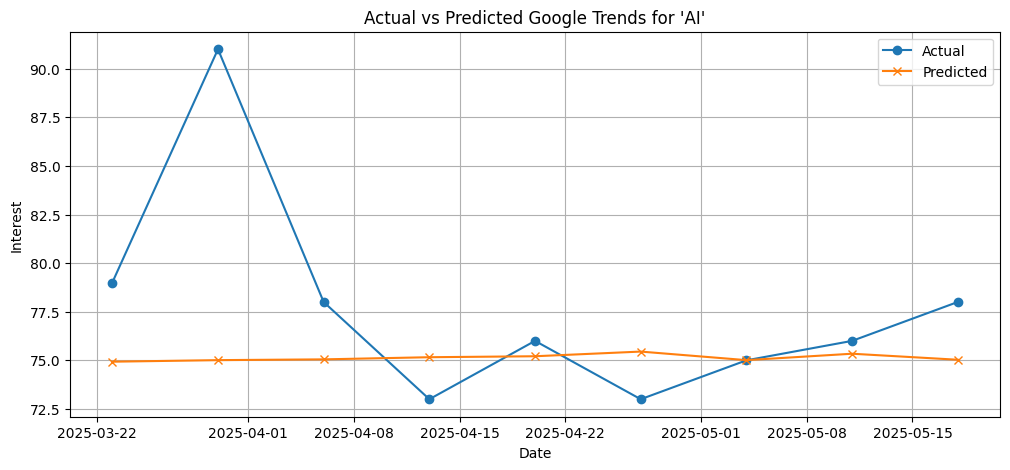

In [136]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title(f"Actual vs Predicted Google Trends for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid()
plt.show()

In [137]:
latest_input = data[[keyword]].tail(n_lags).T.values.flatten().reshape(1, -1)
future_pred = model.predict(latest_input)
print(f"Predicted interest for next day for '{keyword}': {future_pred[0]:.2f}")

Predicted interest for next day for 'AI': 75.37


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

